<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Error and Instability**

When solving ODEs numerically, two key concerns are **accuracy** and **stability**. **Accuracy** measures how close the numerical solution gets to the true (often unknown) solution and is generally expressed using the notation $O(h^p)$, where $h$ is the step size. **Stability**, on the other hand, refers to the method's ability to keep errors from growing uncontrollably as time progresses. A method is stable if it maintains bounded errors over time; otherwise, it is considered unstable.

To explore these ideas, the linear pendulum equation is solved using three different numerical integration methods: Explicit Euler, Implicit Euler, and the Trapezoidal method. For the system $\sqrt{g/l} = 4$ and initial condition $S_0 = [1,\ 0]^T$, the performance of each method is compared over the time interval $[0,\ 5]$ with step size $h = 0.1$.

- **Explicit Euler Method** is unstable for this system. Although it's simple and intuitive, it causes the solution to grow without bound due to accumulated errors, leading to divergence from the exact solution.
- **Implicit Euler Method** is stable but overly damped. It suppresses oscillations too much and does not capture the natural periodic behavior of the pendulum.
- **Trapezoidal Method** strikes a balance by being both stable and accurate. It closely follows the exact cosine solution with a minor phase shift, making it ideal for oscillatory systems.

While the Explicit Euler method may fail due to instability, and the Implicit Euler method may lose fidelity due to excessive damping, the Trapezoidal method offers a reliable and accurate approximation for stable numerical integration of oscillatory ODEs.


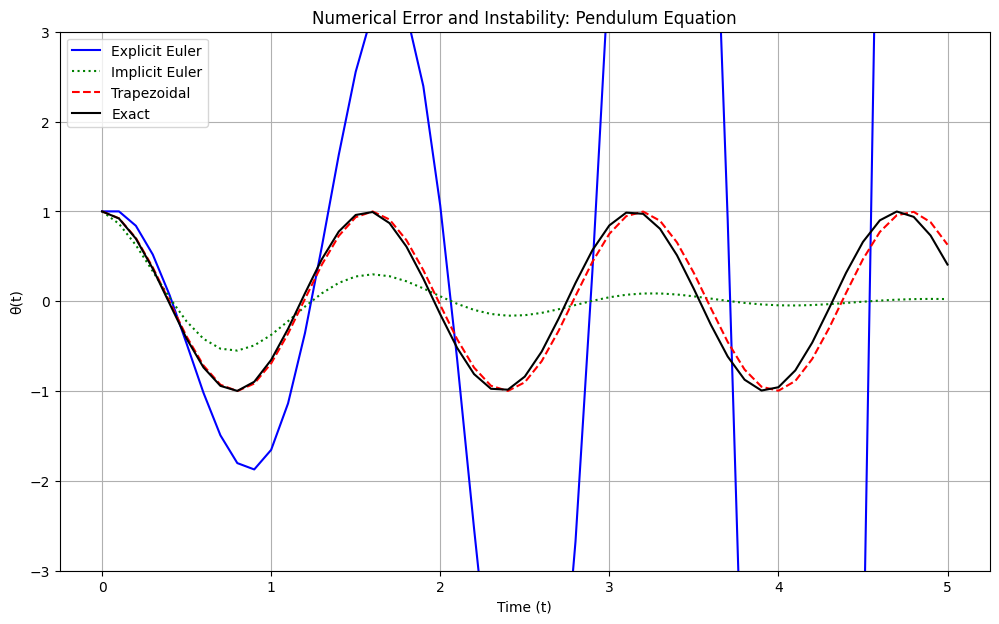

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Step size and time grid
h = 0.1
t = np.arange(0, 5.1, h)

# Frequency sqrt(g/l)
w = 4

# Initial condition: theta = 1, theta_dot = 0
s0 = np.array([[1], [0]])

# Method matrices
m_explicit = np.array([[1, h],
                       [-w**2 * h, 1]])

m_implicit = inv(np.array([[1, -h],
                           [w**2 * h, 1]]))

m_trap = np.dot(
    inv(np.array([[1, -h/2],
                  [w**2 * h / 2, 1]])),
    np.array([[1, h/2],
              [-w**2 * h / 2, 1]])
)

# Initialize solution arrays
s_explicit = np.zeros((len(t), 2))
s_implicit = np.zeros((len(t), 2))
s_trap = np.zeros((len(t), 2))

# Set initial conditions
s_explicit[0, :] = s0.T
s_implicit[0, :] = s0.T
s_trap[0, :] = s0.T

# Integrate using each method
for j in range(len(t) - 1):
    s_explicit[j + 1, :] = np.dot(m_explicit, s_explicit[j, :])
    s_implicit[j + 1, :] = np.dot(m_implicit, s_implicit[j, :])
    s_trap[j + 1, :] = np.dot(m_trap, s_trap[j, :])

# Exact solution
theta_exact = np.cos(w * t)

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(t, s_explicit[:, 0], 'b-', label='Explicit Euler')
plt.plot(t, s_implicit[:, 0], 'g:', label='Implicit Euler')
plt.plot(t, s_trap[:, 0], 'r--', label='Trapezoidal')
plt.plot(t, theta_exact, 'k', label='Exact')
plt.xlabel('Time (t)')
plt.ylabel('θ(t)')
plt.title('Numerical Error and Instability: Pendulum Equation')
plt.ylim([-3, 3])
plt.legend()
plt.grid(True)
plt.show()

# **Predictor-Corrector and Runge-Kutta Methods**

## **Predictor-Corrector Methods**

**Predictor-Corrector Methods** improve the accuracy of numerical solutions to ODEs by first estimating the state at the next time step (the **predictor**) and then refining it using a corrected slope (the **corrector**). The predictor step is typically an explicit method like Euler, while the corrector can be an implicit method.

The **Midpoint Method** is a common predictor-corrector method:
- **Predictor** estimates the midpoint:
  $$
  S\left(t_j + \frac{h}{2}\right) = S(t_j) + \frac{h}{2} F(t_j, S(t_j))
  $$
- **Corrector** refines the full step using this midpoint:
  $$
  S(t_{j+1}) = S(t_j) + h F\left(t_j + \frac{h}{2},\ S\left(t_j + \frac{h}{2}\right)\right)
  $$

This improves upon the basic Euler method by using a more accurate slope derived at the midpoint.



## **Runge-Kutta Methods**

**Runge-Kutta (RK) Methods** are a family of higher-order numerical techniques that avoid computing higher derivatives explicitly (as needed in Taylor series) but still achieve high accuracy.

### **Second-Order Runge-Kutta (RK2)**

RK2 improves accuracy by evaluating the slope at two points and taking their weighted average:

1. Compute intermediate slopes:
   $$
   k_1 = F(t_j, S(t_j)) \\
   k_2 = F(t_j + ph,\ S(t_j) + qhk_1)
   $$
2. Update the solution:
   $$
   S(t_{j+1}) = S(t_j) + h \left( c_1 k_1 + c_2 k_2 \right)
   $$

A popular choice of parameters is:
$$
c_1 = \frac{1}{2},\quad c_2 = \frac{1}{2},\quad p = 1,\quad q = 1
$$



### **Fourth-Order Runge-Kutta (RK4)**

RK4 uses four evaluations of the slope for a highly accurate update:

1. Compute:
   $$
   k_1 = F(t_j, S(t_j)) \\
   k_2 = F\left(t_j + \frac{h}{2},\ S(t_j) + \frac{h}{2}k_1\right) \\
   k_3 = F\left(t_j + \frac{h}{2},\ S(t_j) + \frac{h}{2}k_2\right) \\
   k_4 = F(t_j + h,\ S(t_j) + hk_3)
   $$

2. Final update:
   $$
   S(t_{j+1}) = S(t_j) + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
   $$

RK4 is widely used because it offers excellent accuracy with only four function evaluations per step, and without requiring higher-order derivatives.

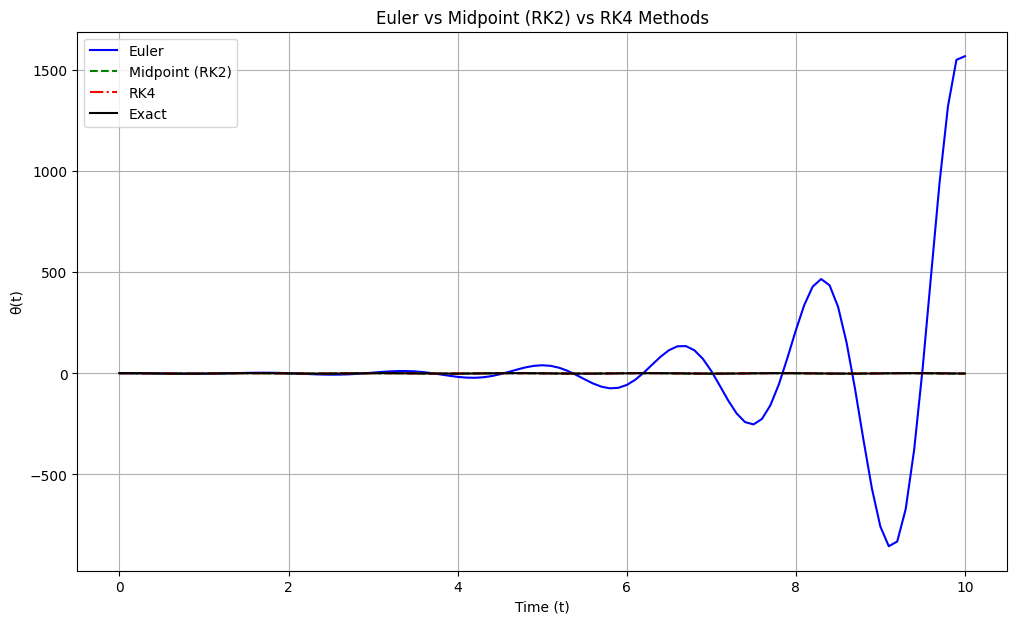

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 4                 # √(g/l)
h = 0.1               # Time step
t = np.arange(0, 10+h, h)
n = len(t)

# Initial state [theta, omega]
s0 = np.array([1.0, 0.0])

# Derivative function F(t, S) = [dθ/dt, dω/dt]
def F(t, S):
    theta, omega = S
    return np.array([omega, -w**2 * theta])

# Initialize solutions
s_euler = np.zeros((n, 2))
s_midpt = np.zeros((n, 2))
s_rk4   = np.zeros((n, 2))

s_euler[0] = s0
s_midpt[0] = s0
s_rk4[0]   = s0

# Integration loop
for j in range(n - 1):
    # Euler
    s_euler[j + 1] = s_euler[j] + h * F(t[j], s_euler[j])

    # Midpoint (RK2)
    k1 = F(t[j], s_midpt[j])
    s_half = s_midpt[j] + (h/2) * k1
    k2 = F(t[j] + h/2, s_half)
    s_midpt[j + 1] = s_midpt[j] + h * k2

    # RK4
    k1 = F(t[j], s_rk4[j])
    k2 = F(t[j] + h/2, s_rk4[j] + h * k1 / 2)
    k3 = F(t[j] + h/2, s_rk4[j] + h * k2 / 2)
    k4 = F(t[j] + h, s_rk4[j] + h * k3)
    s_rk4[j + 1] = s_rk4[j] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)

# Exact solution (cosine wave)
theta_exact = np.cos(w * t)

# Plot
plt.figure(figsize=(12, 7))
plt.plot(t, s_euler[:, 0], 'b-', label='Euler')
plt.plot(t, s_midpt[:, 0], 'g--', label='Midpoint (RK2)')
plt.plot(t, s_rk4[:, 0], 'r-.', label='RK4')
plt.plot(t, theta_exact, 'k', label='Exact')

plt.xlabel('Time (t)')
plt.ylabel('θ(t)')
plt.title('Euler vs Midpoint (RK2) vs RK4 Methods')
plt.legend()
plt.grid(True)
plt.show()